![display relevant image here](path/url/to/image)
- Banner/header image

# Title
- Relevant to Data and Business Context

## Overview
- BLUF (Bottom Line Up Front)
- One paragraph summary of final model performance and business implications
- Frame your 'story'

## Business Understanding

1. Begin by thoroughly analyzing the business context of FinTech Innovations' loan approval process. Write a short summary that:
- Describes the current manual process and its limitations
- Identifies key stakeholders and their needs
- Explains the implications of different types of model errors
- Justifies your choice between classification and regression approaches

2. Define your modeling goals and success criteria:
- Select appropriate evaluation metrics based on business impact
- You must use at least two different metrics
- Consider creating custom metric
- Establish baseline performance targets
- Document your reasoning for each choice


1. The current manual process for loan approval involves loan officers reviewing applications, making decisions that can be inconsistant and time consuming. The loan officers need a data-driven method that implements a standard review process, hopefully reducing bias while also improving efficiencies in loan approval. By developing a machine learning model to review these applications, these officers can more quickly and successfully identify the risk behind these loans and make accurate business decisions. 

2. 

## Data Understanding
3. Conduct comprehensive exploratory data analysis:
- Describe basic data characteristics
- Examine distributions of all features and target variables
- Investigate relationships between features
- Create visualizations to help aid in EDA
- Document potential data quality issues and their implications

4. Develop feature understanding:
- Categorize features by type (numerical, categorical, ordinal)
- Identify features requiring special preprocessing
- Document missing value patterns and their potential meanings
- Note potential feature engineering opportunities


In [116]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, make_scorer, roc_auc_score, RocCurveDisplay, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

df = pd.read_csv('Loan.csv')

In [3]:
# EDA Code Here - Create New Cells As Needed
df.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [5]:
df.isnull().sum().sort_values(ascending=False)

ApplicationDate               0
Age                           0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
LoanApproved                  0
PreviousLoanDefaults          0
LoanPurpose                   0
BankruptcyHistory             0
LoanDuration                  0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
MaritalStatus                 0
DebtToIncomeRatio             0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyD

In [6]:
df.nunique()

ApplicationDate               20000
Age                              63
AnnualIncome                  17516
CreditScore                     322
EmploymentStatus                  3
EducationLevel                    5
Experience                       62
LoanAmount                    15578
LoanDuration                     10
MaritalStatus                     4
NumberOfDependents                6
HomeOwnershipStatus               4
MonthlyDebtPayments            1299
CreditCardUtilizationRate     20000
NumberOfOpenCreditLines          14
NumberOfCreditInquiries           8
DebtToIncomeRatio             20000
BankruptcyHistory                 2
LoanPurpose                       5
PreviousLoanDefaults              2
PaymentHistory                   38
LengthOfCreditHistory            29
SavingsAccountBalance          9199
CheckingAccountBalance         5151
TotalAssets                   18814
TotalLiabilities              17163
MonthlyIncome                 17489
UtilityBillsPaymentHistory  

In [7]:
df['LoanApproved'].value_counts(normalize=True)

LoanApproved
0    0.761
1    0.239
Name: proportion, dtype: float64

In [9]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

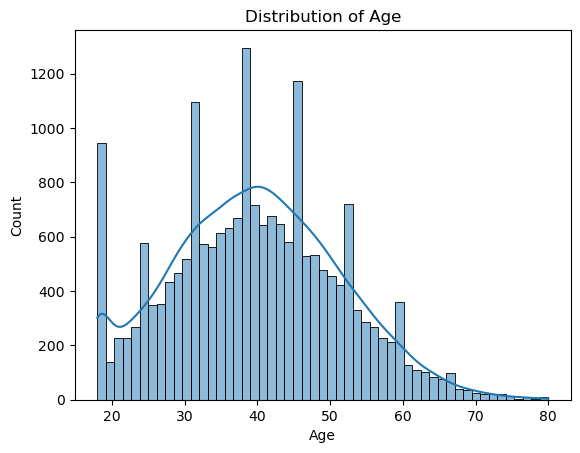

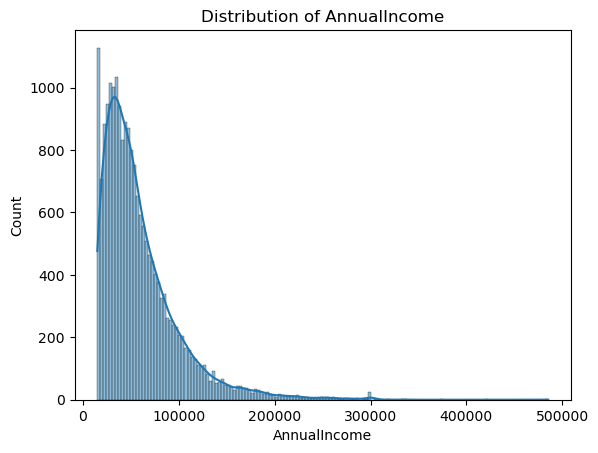

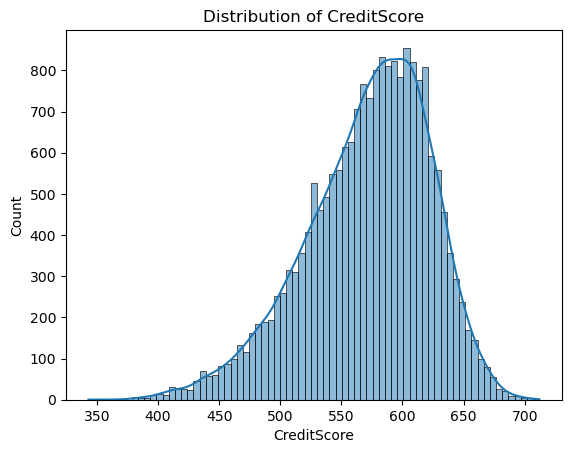

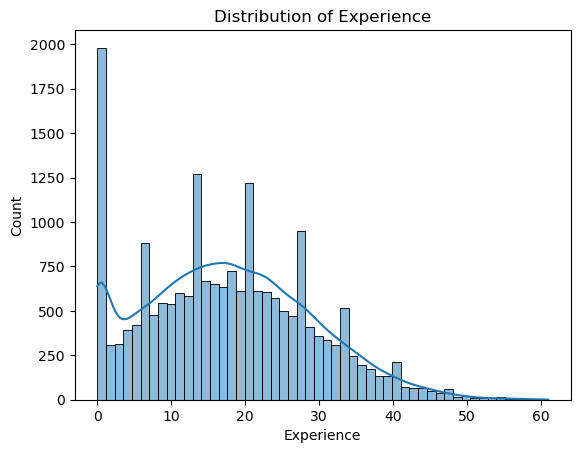

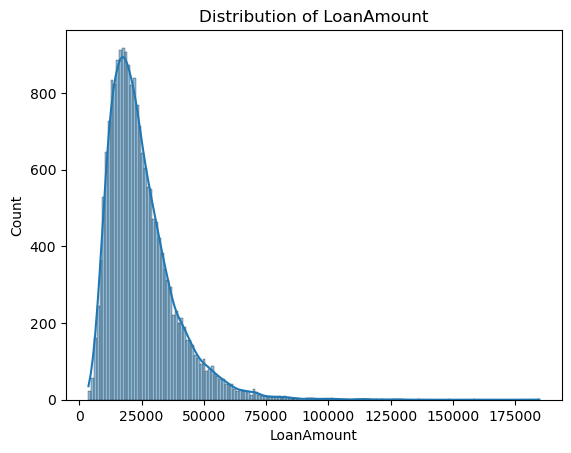

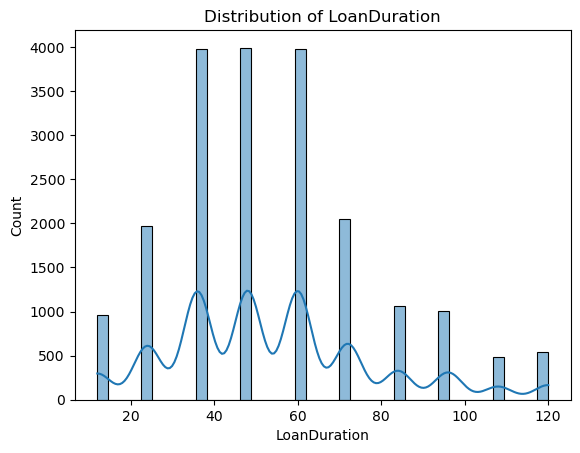

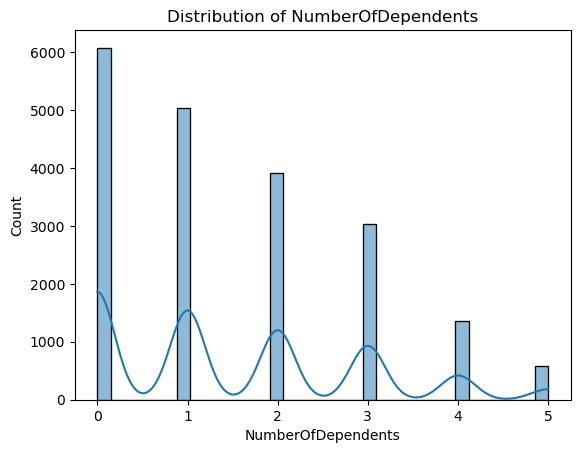

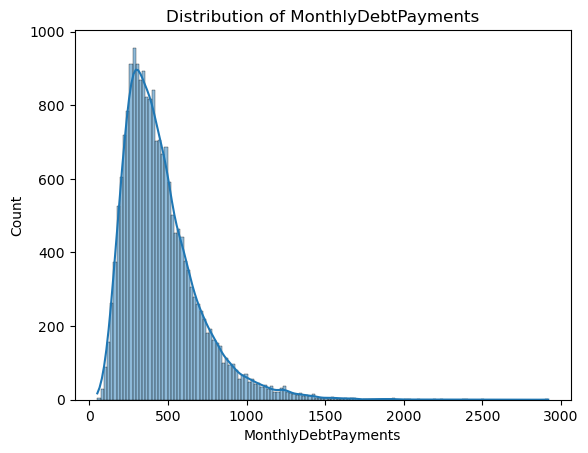

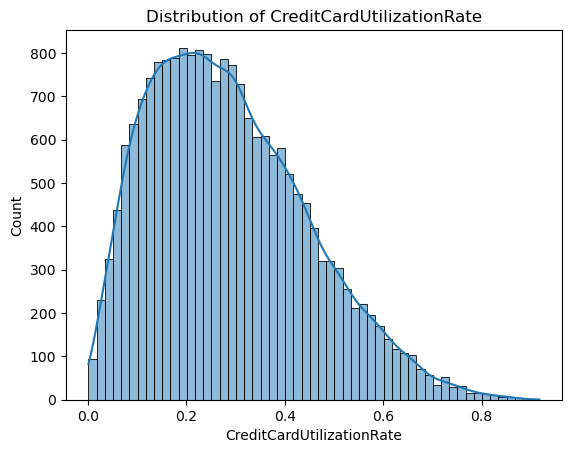

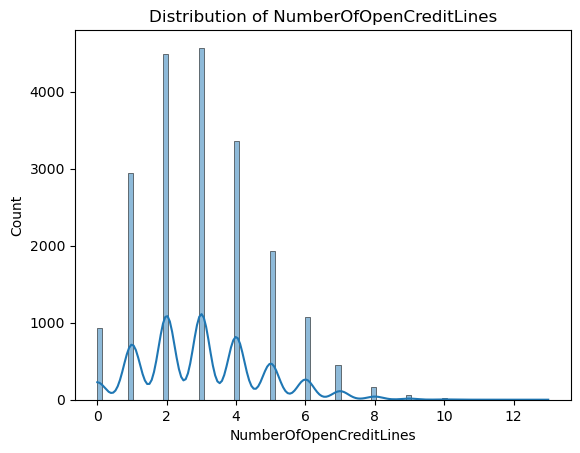

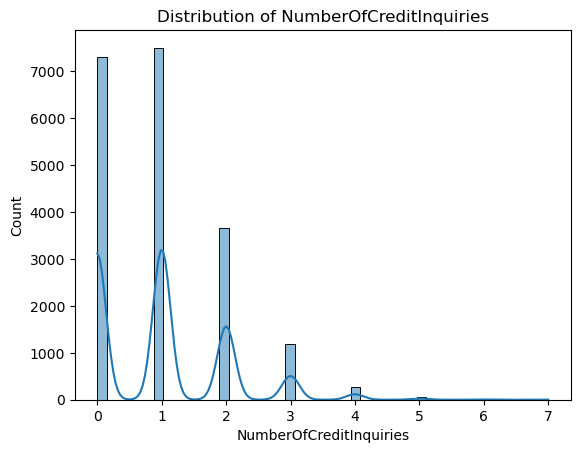

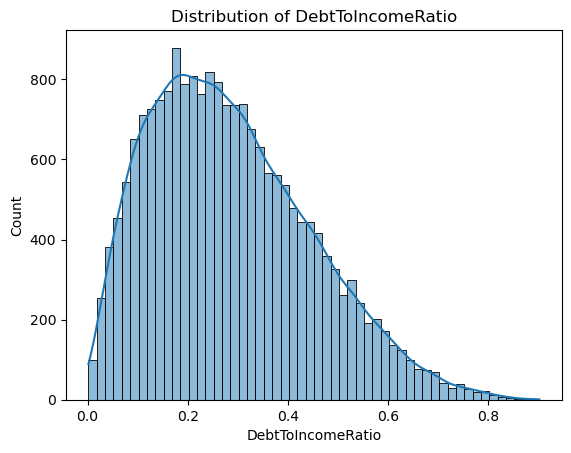

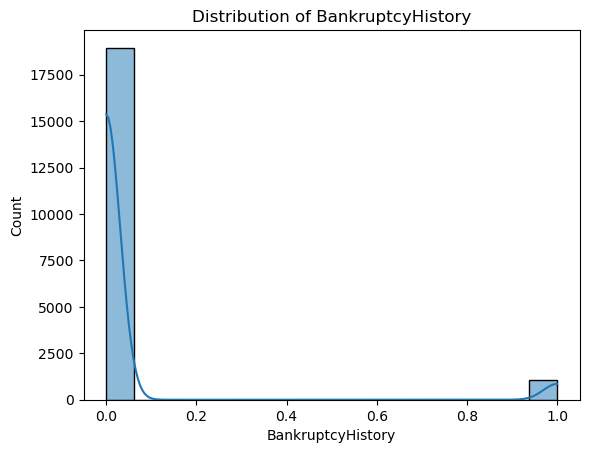

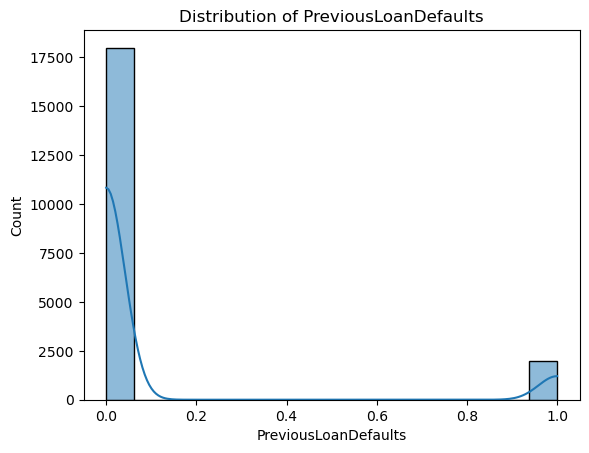

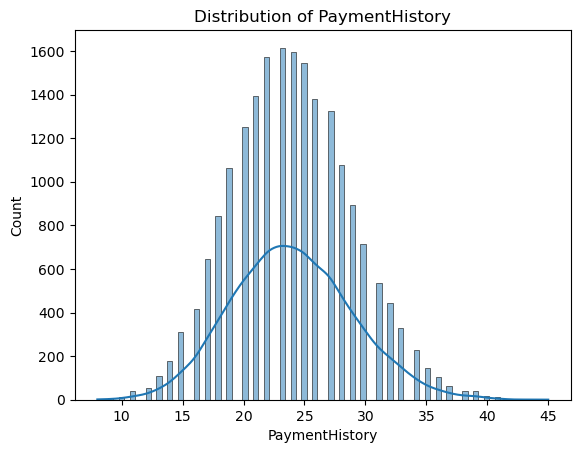

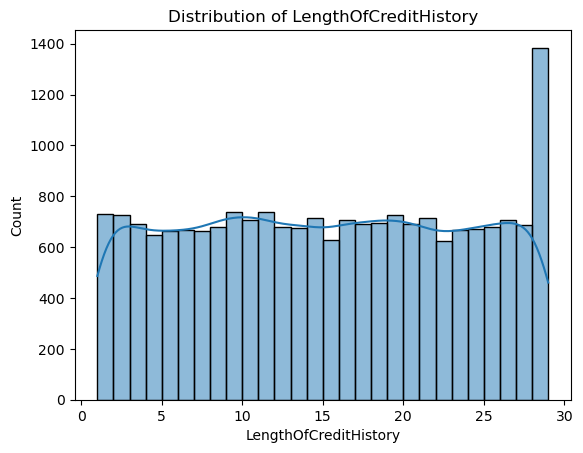

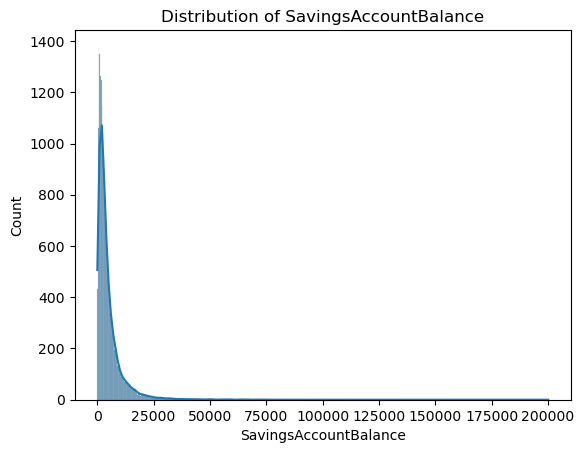

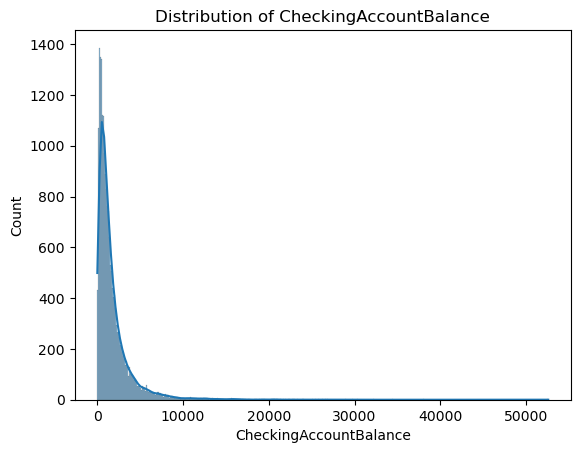

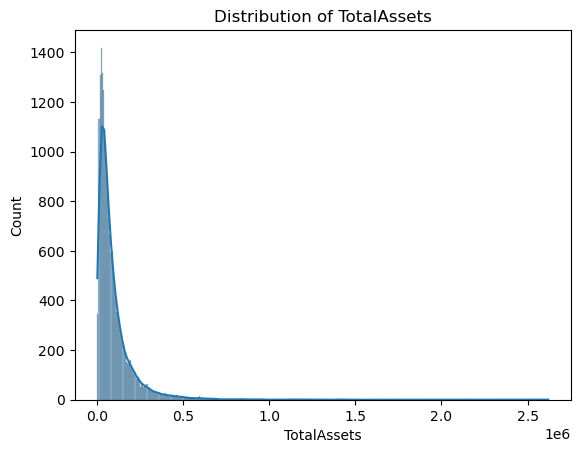

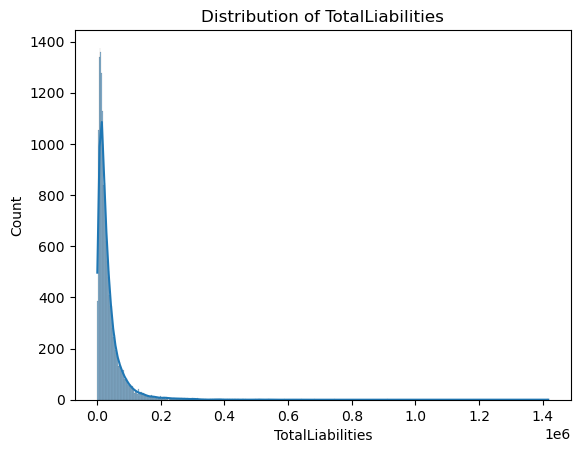

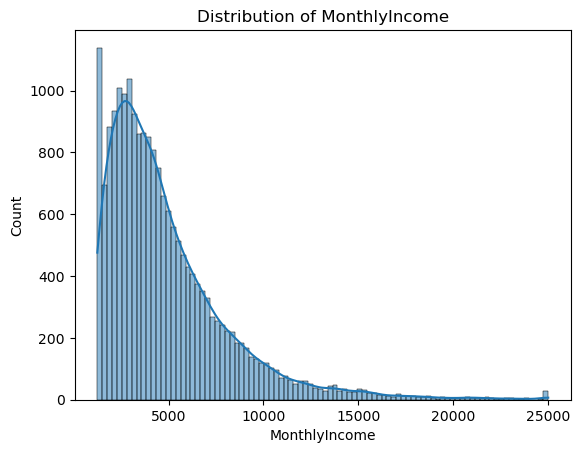

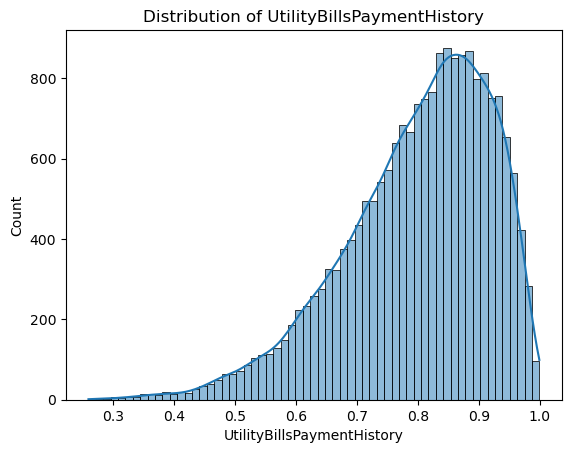

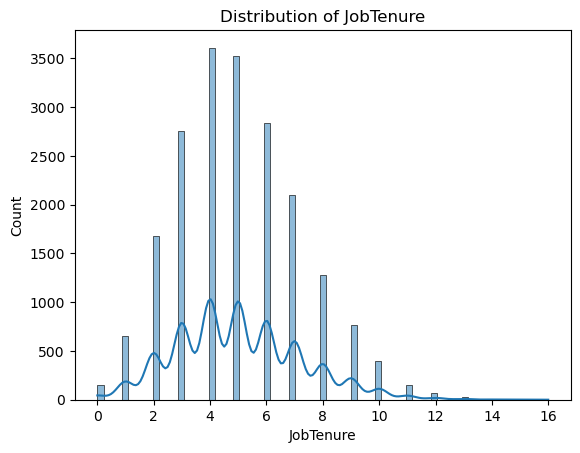

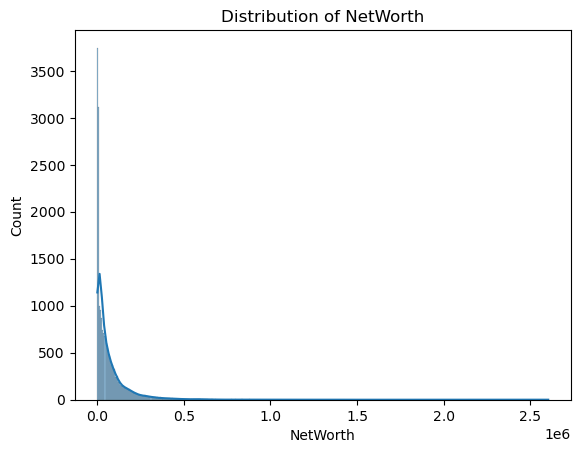

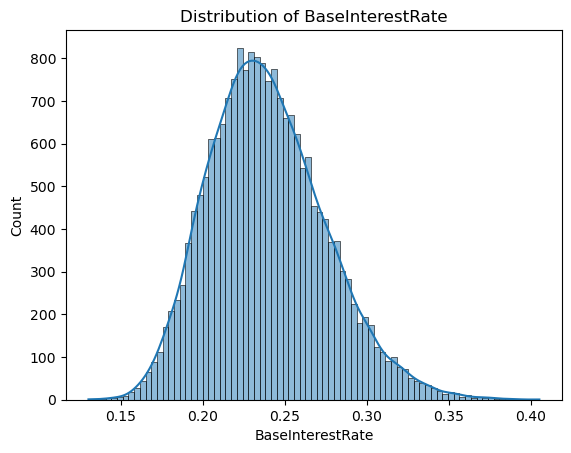

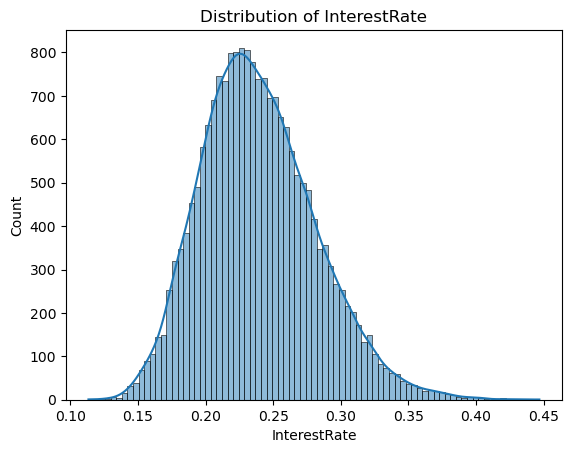

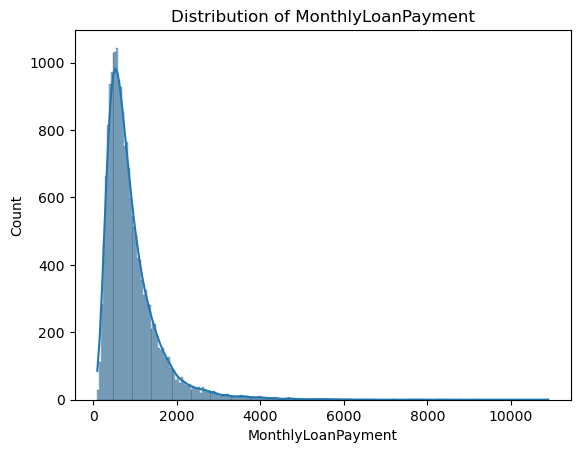

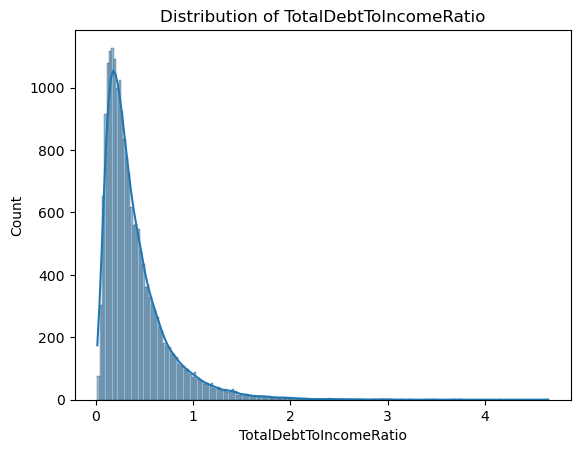

In [30]:
#Separating numerical features

num_cols = ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 
            'LoanAmount', 'LoanDuration', 'NumberOfDependents', 
            'MonthlyDebtPayments','CreditCardUtilizationRate', 
            'NumberOfOpenCreditLines','NumberOfCreditInquiries', 
            'DebtToIncomeRatio', 'BankruptcyHistory','PreviousLoanDefaults',
            'PaymentHistory', 'LengthOfCreditHistory', 
            'SavingsAccountBalance','CheckingAccountBalance', 'TotalAssets', 
            'TotalLiabilities','MonthlyIncome', 'UtilityBillsPaymentHistory', 
            'JobTenure', 'NetWorth','BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
            'TotalDebtToIncomeRatio']

#Plotting
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [31]:
#Closer look at numerical columns that stand out

num_cols_exam = ['Age', 'AnnualIncome','Experience', 'LengthOfCreditHistory', 
                 'MonthlyIncome','NetWorth',]

for col in num_cols_exam:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().to_string())


Value counts for Age:
Age
18    803
40    715
39    682
42    676
37    669
43    647
41    644
36    632
35    614
38    613
45    610
32    600
44    582
33    574
46    564
34    561
48    532
47    528
30    516
31    494
49    478
29    468
50    456
28    434
51    421
52    365
53    356
27    353
26    348
54    331
25    308
55    287
24    267
23    267
56    266
22    228
21    227
57    226
58    212
59    184
60    176
19    142
20    140
61    129
62    110
63    102
64     84
65     76
66     57
67     41
68     38
69     37
70     25
71     21
72     20
73     14
75     14
77     10
80      8
74      8
76      4
78      3
79      3

Value counts for AnnualIncome:
AnnualIncome
15000     584
300000     26
68064       4
24627       4
36604       4
26437       4
26721       4
34958       4
31117       3
43720       3
35216       3
61330       3
32641       3
95552       3
51640       3
29952       3
35651       3
29237       3
41421       3
63580       3
38144       3
7172

1. Age distribution looks normal despite jumps in histplot
2. AnnualIncome - spikes suggest a max and min that applicants may be outside of, but the info is limited by the application
3. Experience - spike at zero seems normal (not employed) but spikes in between could highlight people's tendency to generalize
4. LengthOfCreditHistory - looks normal, could be a result of binning.
5. Similar to AnnualIncome - shows a high and low cutout. Just Annual divided?
6. Net worth appears to be fine

In [119]:
df['AnnualIncome'].corr(df['MonthlyIncome'] * 12)

0.9899107753669939

^related

In [32]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

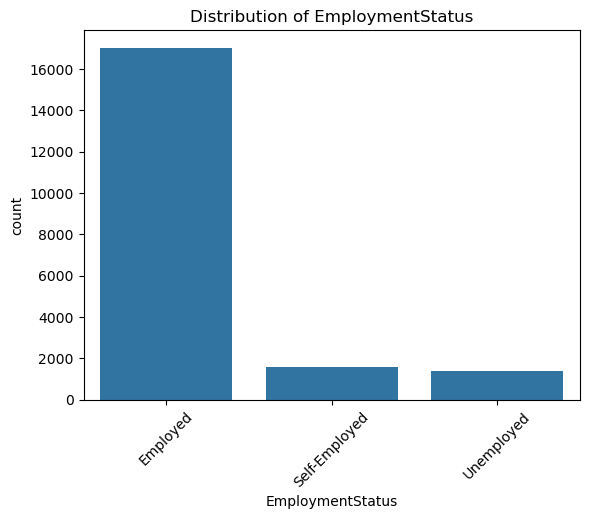

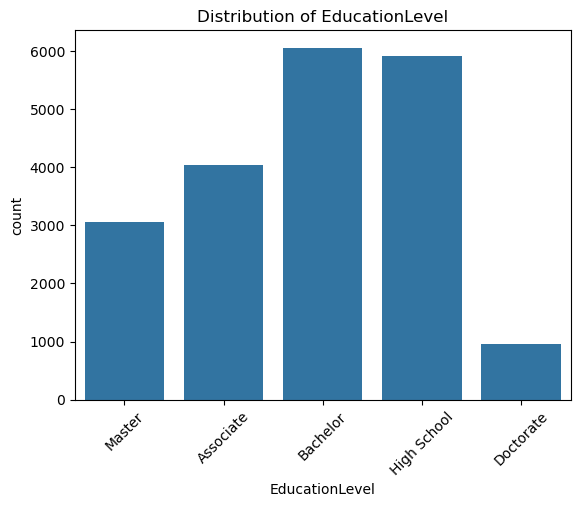

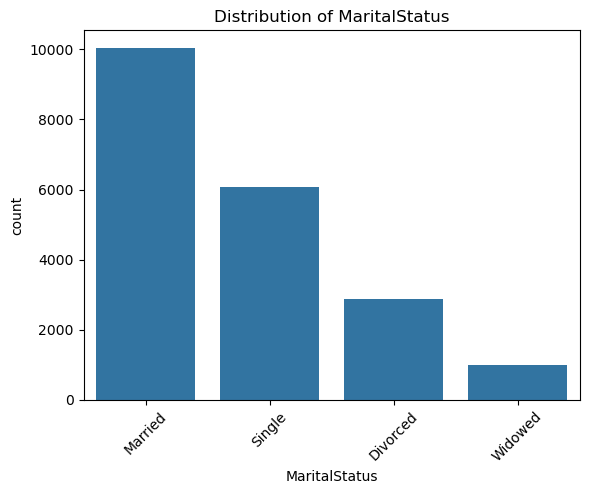

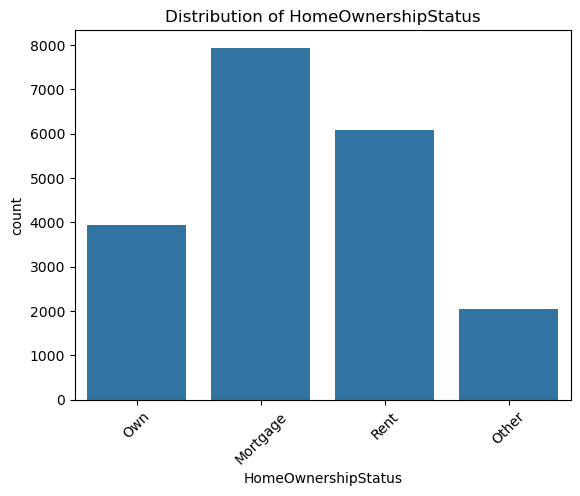

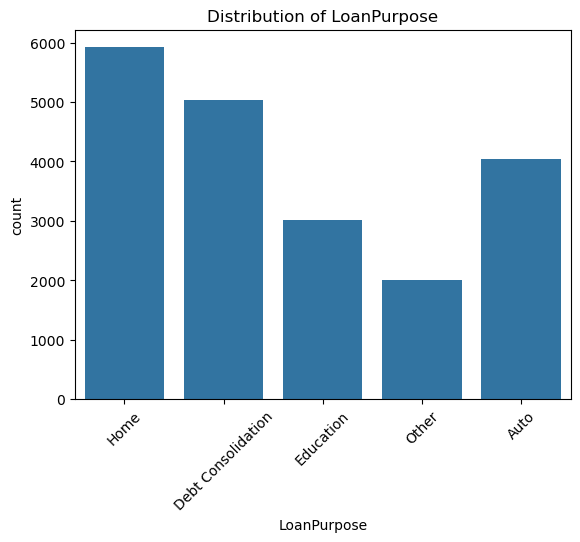

In [33]:
#Separating categorical features

cat_cols = ['EmploymentStatus', 'EducationLevel','MaritalStatus',
            'HomeOwnershipStatus', 'LoanPurpose'
           ]

for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Question for loan defaults and bankruptcy - is it 0 if no 1 if yes, or is it numeric and there just happens to only be 1 max

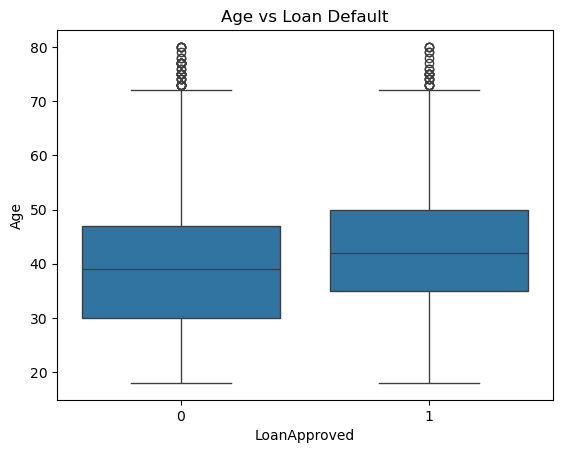

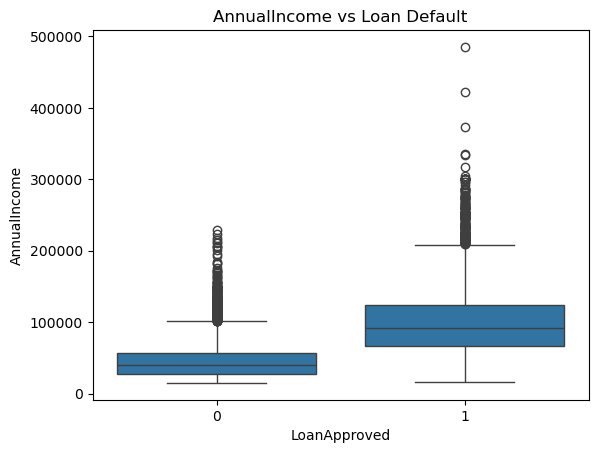

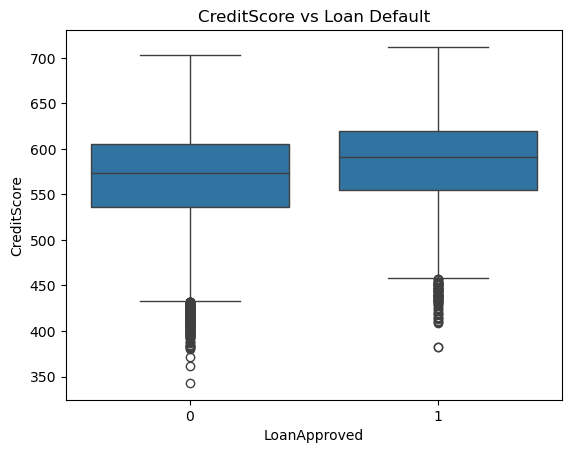

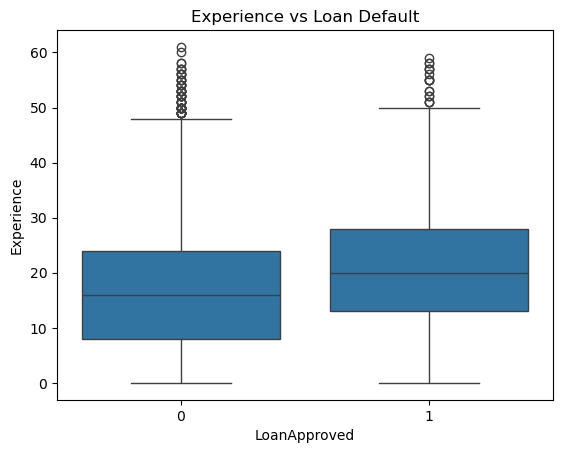

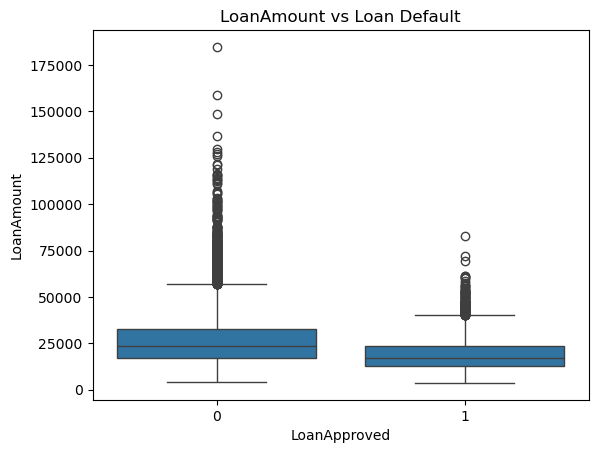

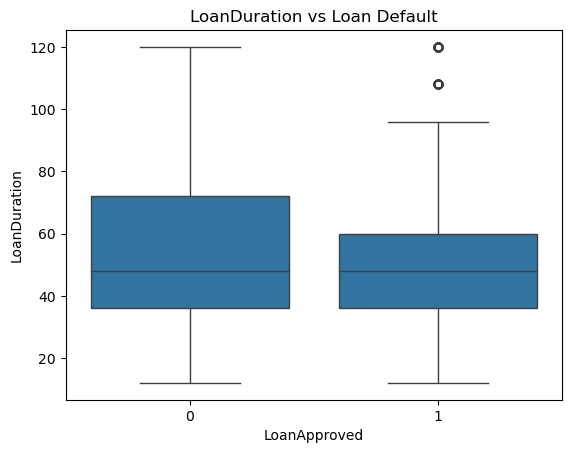

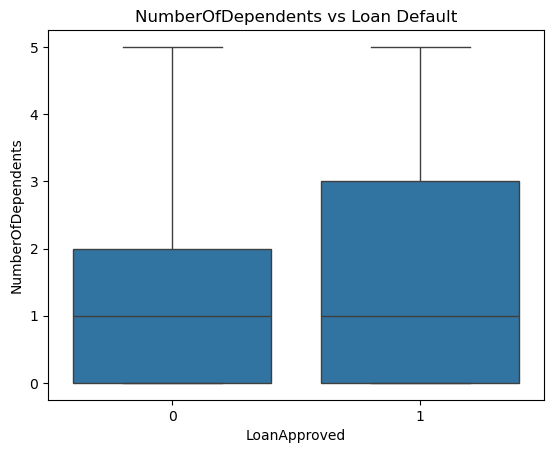

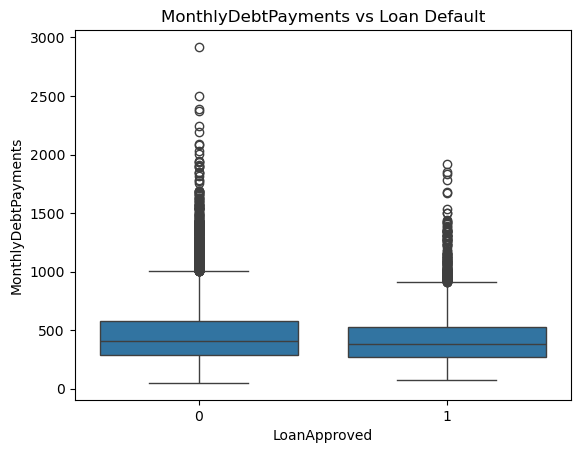

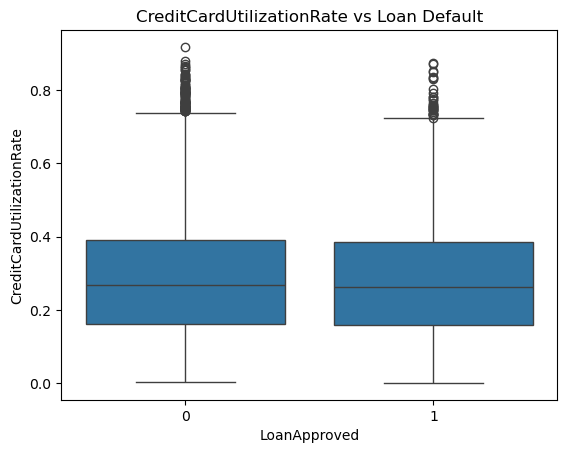

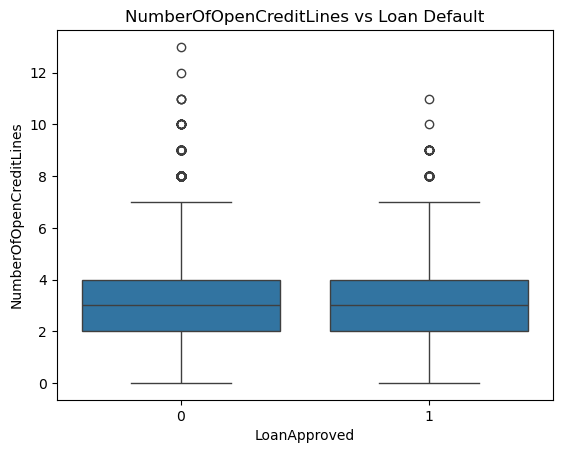

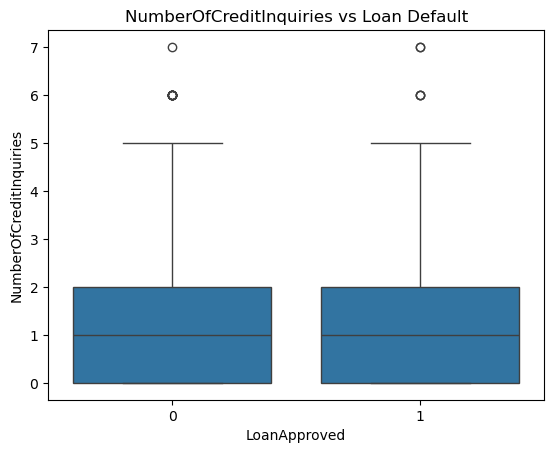

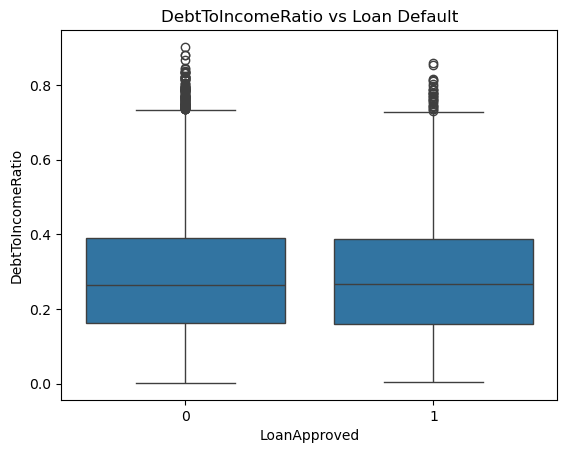

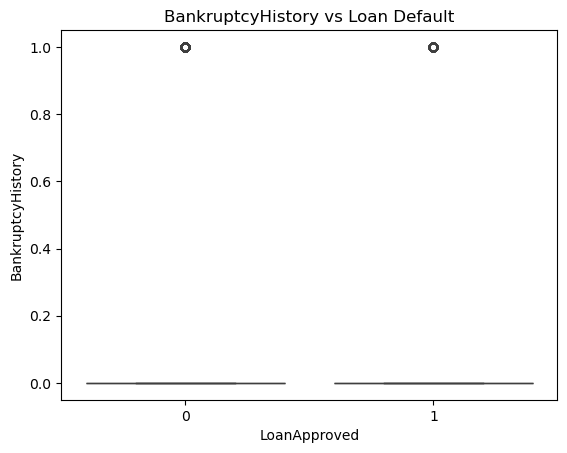

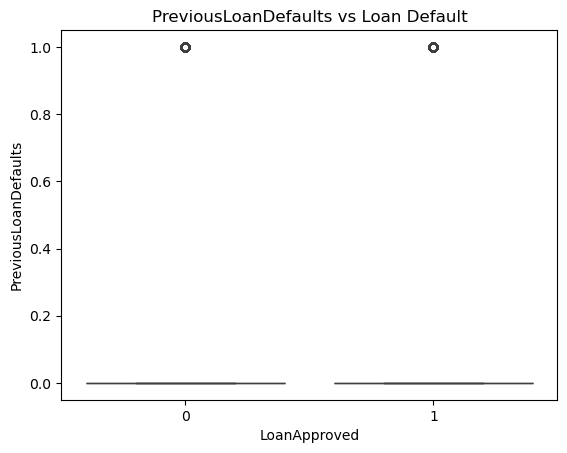

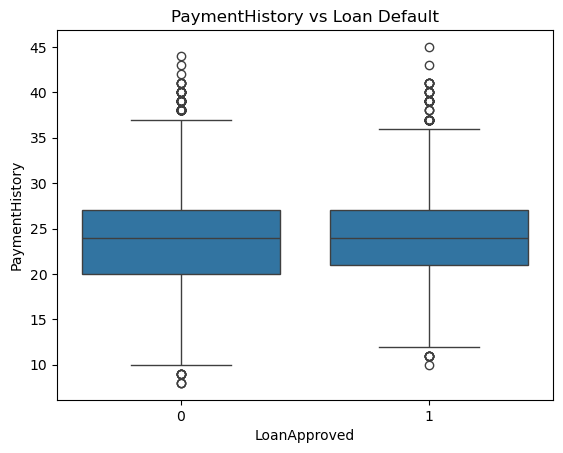

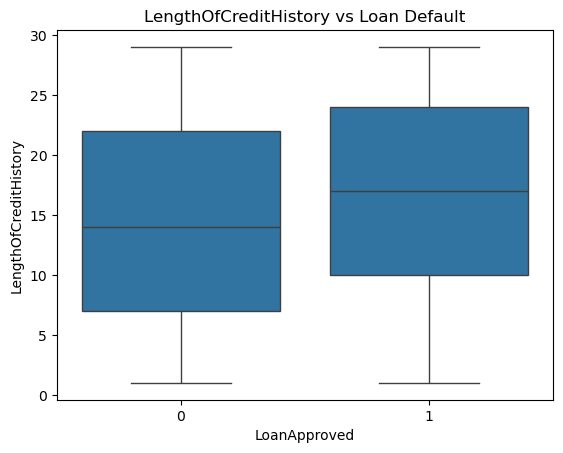

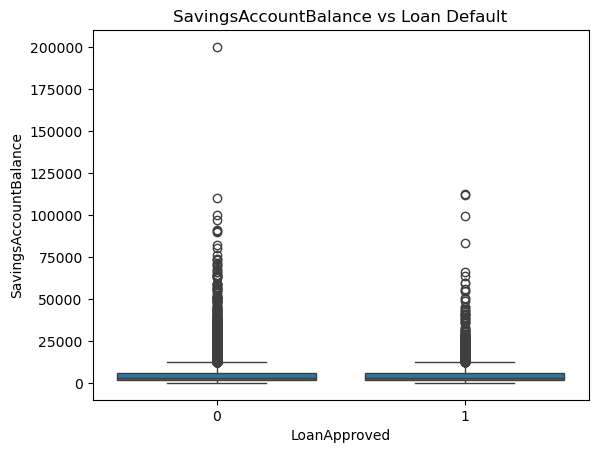

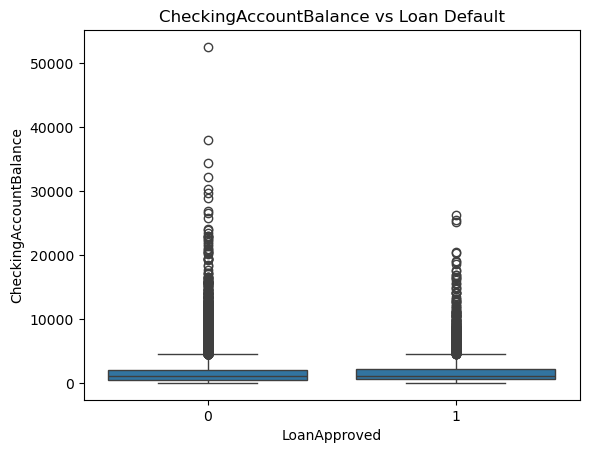

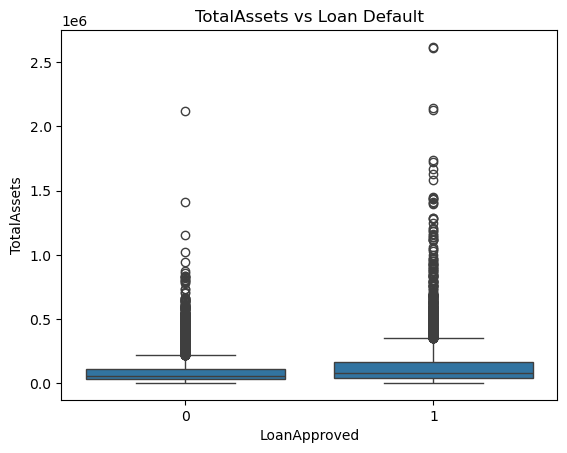

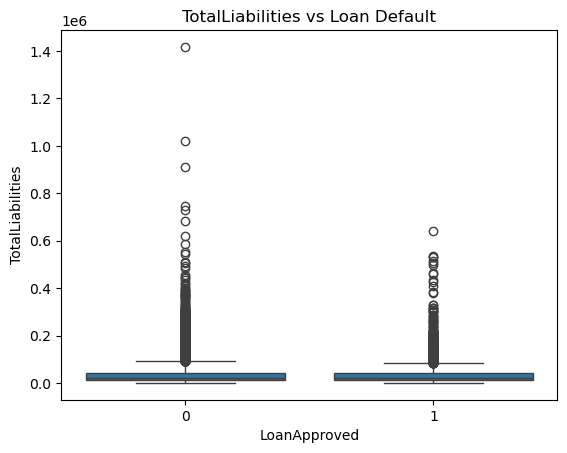

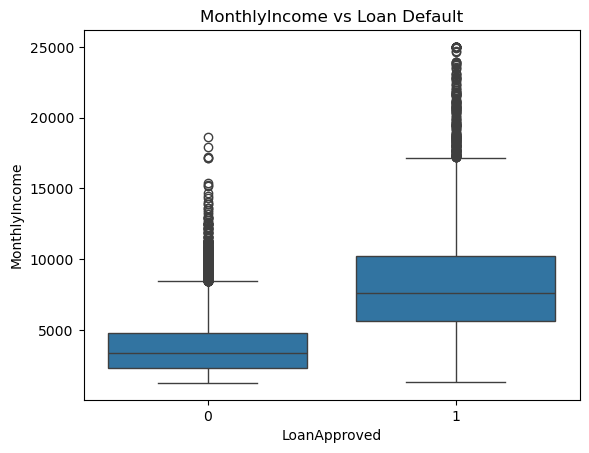

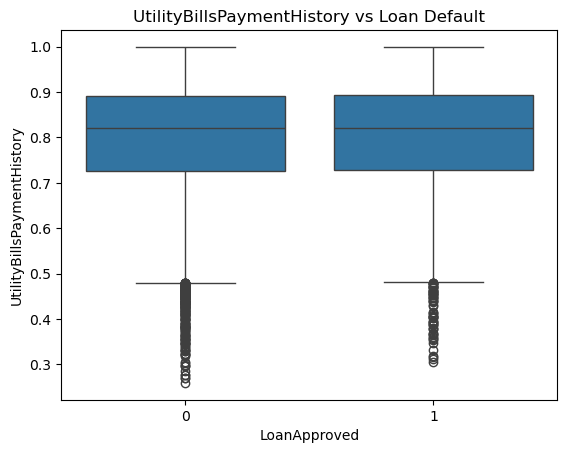

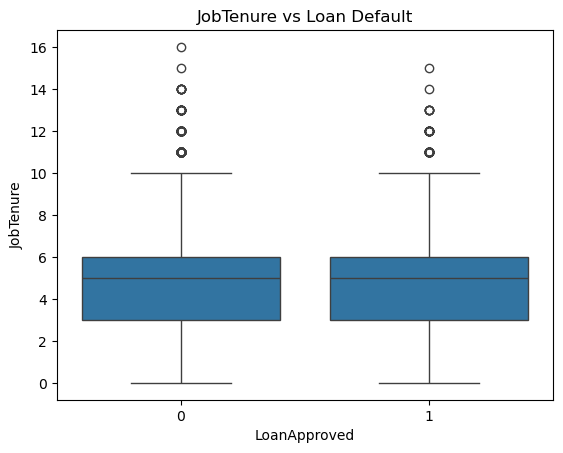

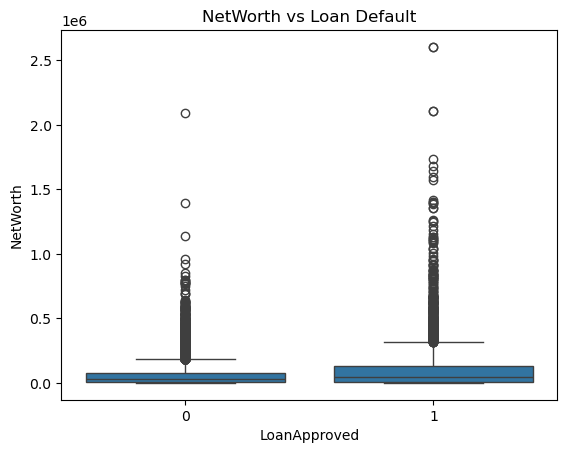

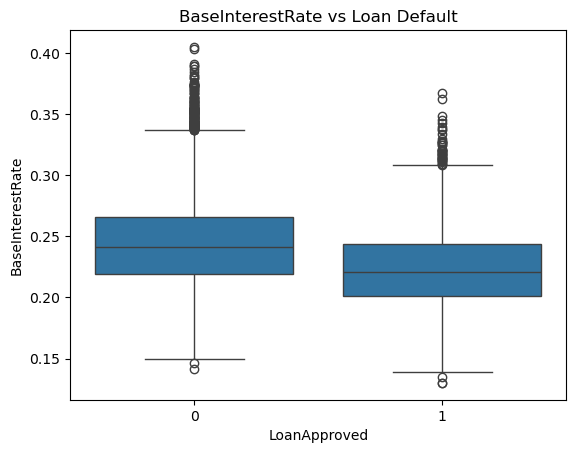

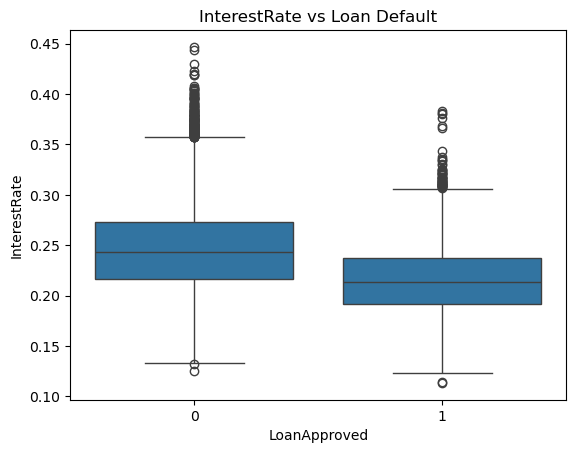

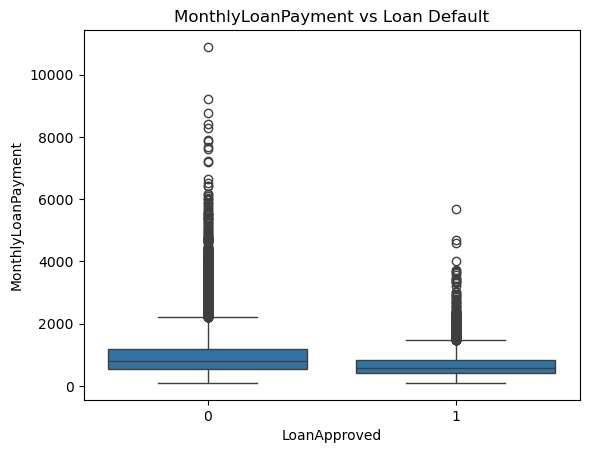

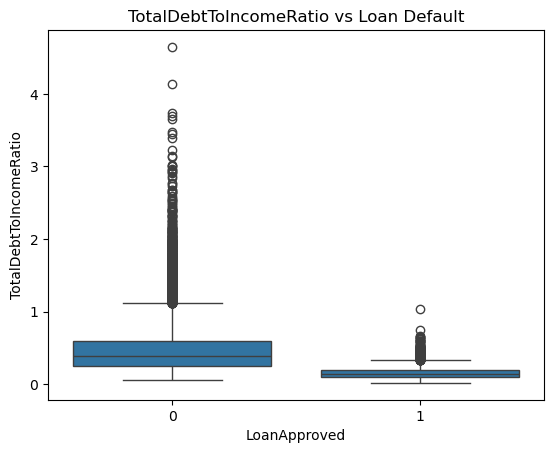

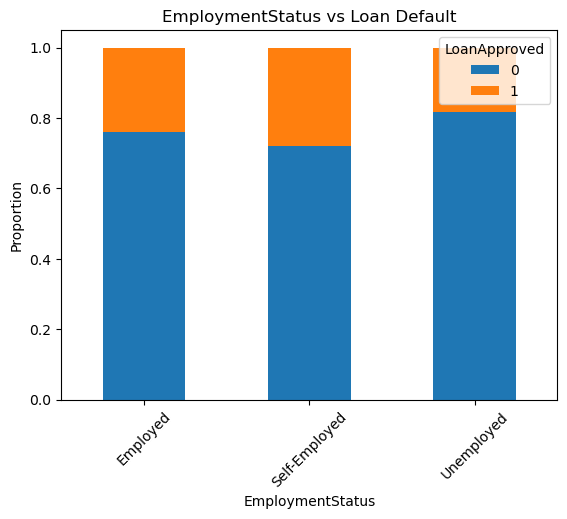

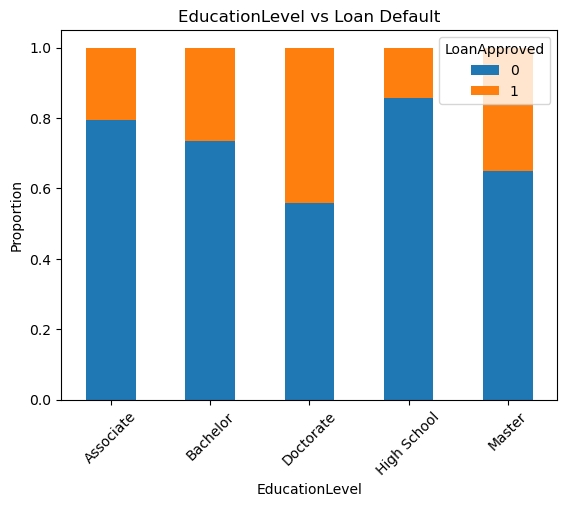

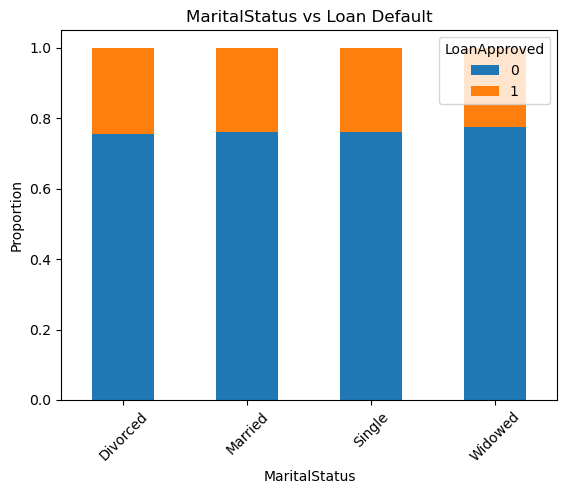

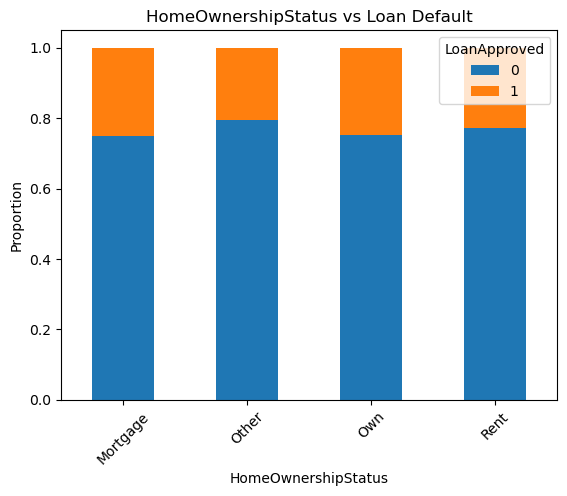

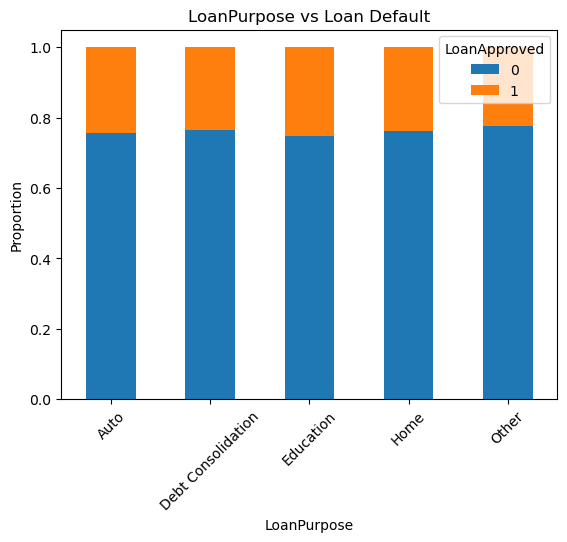

In [34]:
# Numerical vs target
for col in num_cols:
    sns.boxplot(data=df, x='LoanApproved', y=col)
    plt.title(f'{col} vs Loan Default')
    plt.show()

# Categorical vs target
for col in cat_cols:
    ct = pd.crosstab(df[col], df['LoanApproved'], normalize='index')
    ct.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Loan Default')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

Lots of outliers

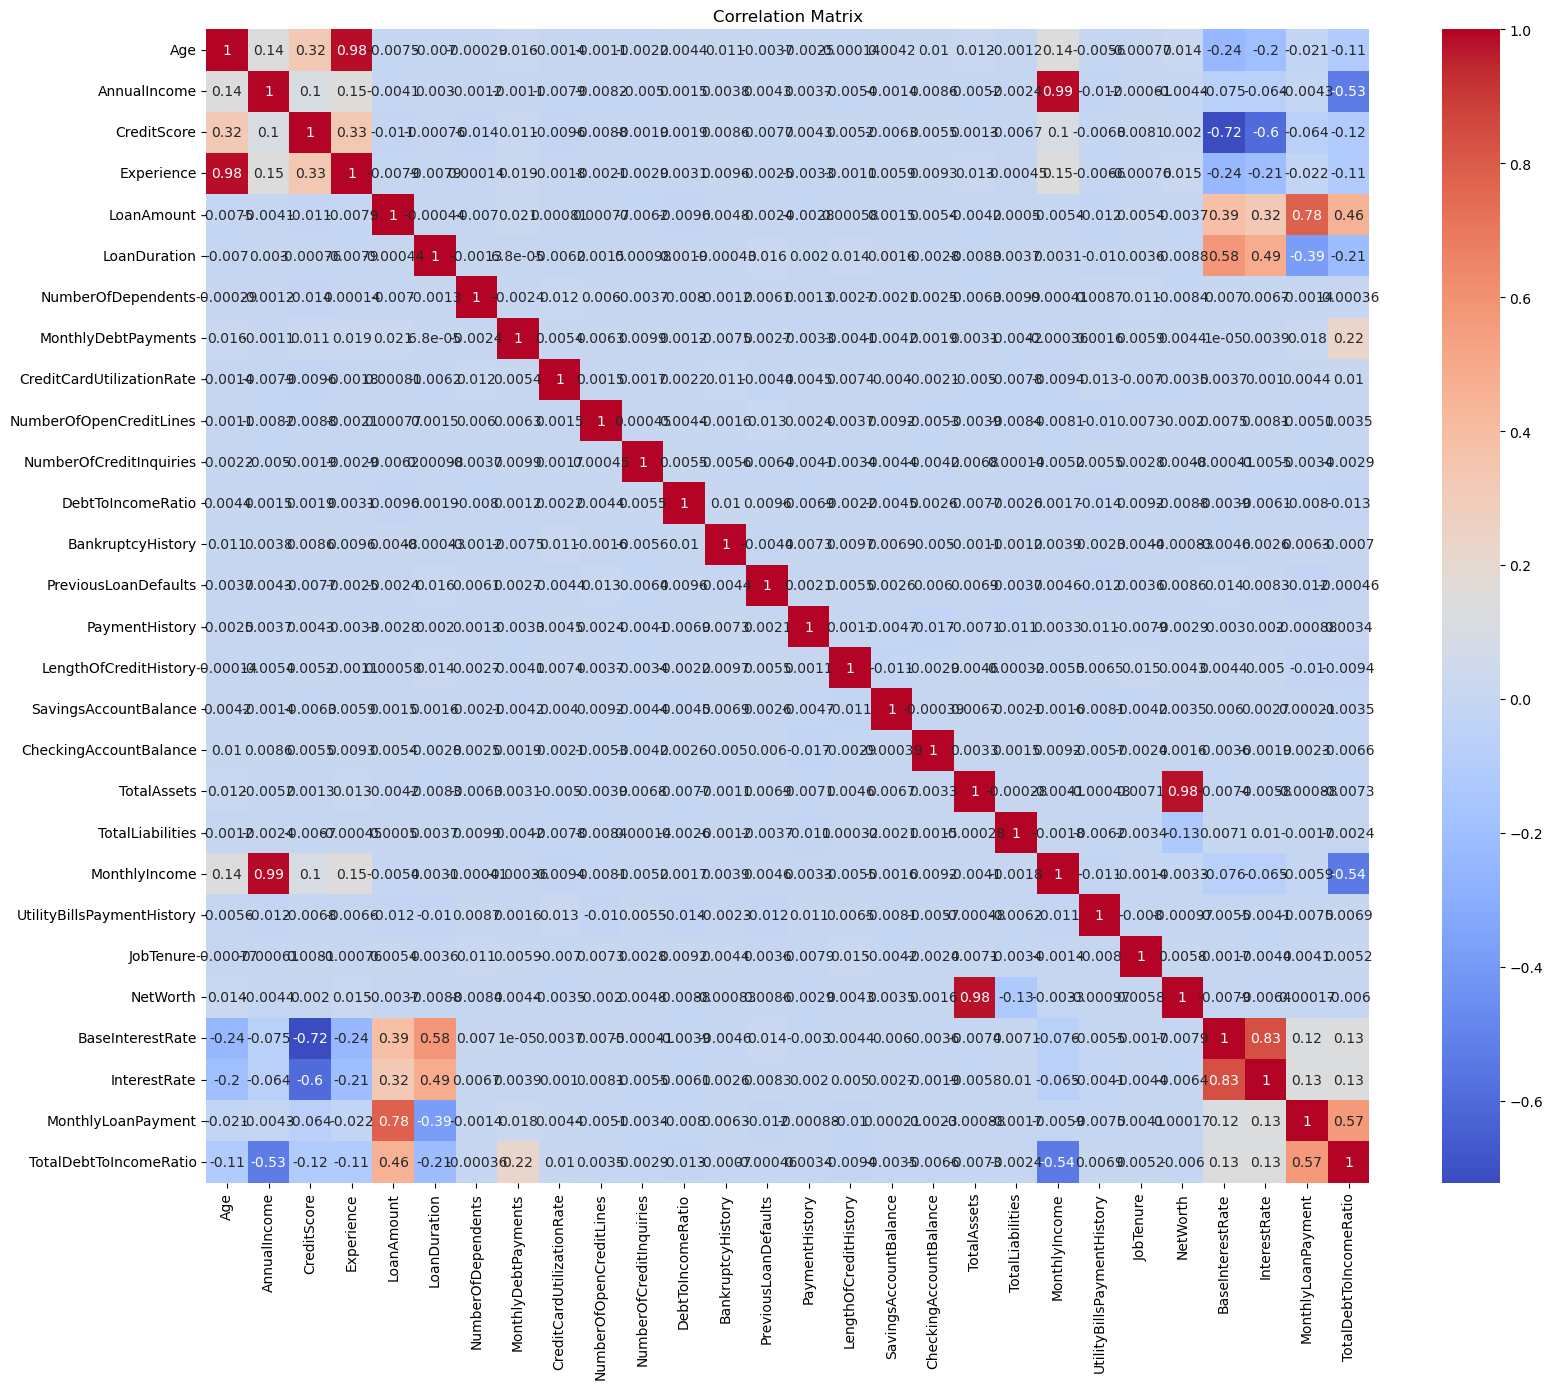

In [35]:
corr = df[num_cols].corr()
plt.figure(figsize=(len(num_cols) * 0.6, len(num_cols) * 0.5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [50]:
print("\n===== KEY FINDINGS FROM DATA EXPLORATION =====")
print("1. Numeric feature relationships with failing:")
for feature in num_cols:
    correlation = df[[feature, 'LoanApproved']].corr().iloc[0, 1]
    print(f"   - {feature}: {correlation:.3f} correlation with LoanApproved")

print("\n2. Categorical feature impact:")
for feature in cat_cols:
    LoanApproved_rates = df.groupby(feature)['LoanApproved'].mean().sort_values(ascending=False)
    print(f"   - {feature}: Highest LoanApproved rate in '{LoanApproved_rates.index[0]}' ({LoanApproved_rates.iloc[0]:.2%}), " +
          f"lowest in '{LoanApproved_rates.index[-1]}' ({LoanApproved_rates.iloc[-1]:.2%})")

print("\n3. Missing value analysis:")
count = 0
for feature in df.columns:
    missing_pct = df[feature].isnull().mean() * 100
    if missing_pct > 0:
        print(f"   - {feature}: {missing_pct:.1f}% missing")
        count += 1
if count < 1:
    print('None')


===== KEY FINDINGS FROM DATA EXPLORATION =====
1. Numeric feature relationships with failing:
   - Age: 0.141 correlation with LoanApproved
   - AnnualIncome: 0.598 correlation with LoanApproved
   - CreditScore: 0.142 correlation with LoanApproved
   - Experience: 0.141 correlation with LoanApproved
   - LoanAmount: -0.239 correlation with LoanApproved
   - LoanDuration: -0.095 correlation with LoanApproved
   - NumberOfDependents: 0.002 correlation with LoanApproved
   - MonthlyDebtPayments: -0.070 correlation with LoanApproved
   - CreditCardUtilizationRate: -0.010 correlation with LoanApproved
   - NumberOfOpenCreditLines: -0.005 correlation with LoanApproved
   - NumberOfCreditInquiries: -0.006 correlation with LoanApproved
   - DebtToIncomeRatio: 0.000 correlation with LoanApproved
   - BankruptcyHistory: -0.071 correlation with LoanApproved
   - PreviousLoanDefaults: -0.065 correlation with LoanApproved
   - PaymentHistory: 0.031 correlation with LoanApproved
   - LengthOfCredi

## Data Preparation
5. Design your preprocessing strategy:
- Create separate preprocessing flows for different feature types
- Must utilize ColumnTransformer and Pipeline
- Consider using FeatureUnion as well
- Handle missing values appropriately for each feature
- Handle Categorical and Ordinal data appropriately
- Scale numeric values if model requires it (linear model)
- Document your reasoning for each preprocessing decision



In [36]:
for col in cat_cols:
    print({col}, df[col].unique())

{'EmploymentStatus'} ['Employed' 'Self-Employed' 'Unemployed']
{'EducationLevel'} ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
{'MaritalStatus'} ['Married' 'Single' 'Divorced' 'Widowed']
{'HomeOwnershipStatus'} ['Own' 'Mortgage' 'Rent' 'Other']
{'LoanPurpose'} ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [44]:
# Data Prep Code Here - Create New Cells As Needed
numeric_features = ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 
            'LoanAmount', 'LoanDuration', 'NumberOfDependents', 
            'MonthlyDebtPayments','CreditCardUtilizationRate', 
            'NumberOfOpenCreditLines','NumberOfCreditInquiries', 
            'DebtToIncomeRatio', 'BankruptcyHistory','PreviousLoanDefaults',
            'PaymentHistory', 'LengthOfCreditHistory', 
            'SavingsAccountBalance','CheckingAccountBalance', 'TotalAssets', 
            'TotalLiabilities','MonthlyIncome', 'UtilityBillsPaymentHistory', 
            'JobTenure', 'NetWorth','BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
            'TotalDebtToIncomeRatio']

nominal_features = ['EmploymentStatus','MaritalStatus',
            'HomeOwnershipStatus', 'LoanPurpose']

ordinal_features = ['EducationLevel']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), #handle with median for missing values
    ('scaler', StandardScaler()) #Scale numeric featues
])

nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), #handle missing values with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), #handle missing values with most frequent
    ('encoder', OrdinalEncoder(categories=[
        ['High School','Associate','Bachelor','Master','Doctorate'] #Order by level of education
    ]))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('nom', nominal_pipeline, nominal_features),
    ('ord', ordinal_pipeline, ordinal_features)
])

## Modeling
6. Implement your modeling approach:
- Choose appropriate model algorithms based on your problem definition
- Set up validation strategy with chosen metrics
- Use a train test split and cross validation
- Create complete pipeline including any preprocessing and model
- Document your reasoning for each modeling decision

7. Optimize your model:
- Define parameter grid based on your understanding of the algorithms
- Implement GridSearchCV and/or RandomizedSearchCV with chosen metrics
- Consider tuning preprocessing steps
- Track and document the impact of different parameter combinations
- Consider the trade-offs between different model configurations

NOTE: Be mindful of time considerations - showcase “how to tune” 


In [77]:
#  Modeling Code Here - Create New Cells as Needed
X = df.drop('LoanApproved', axis=1)
y = df['LoanApproved']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# 1. Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 2. Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# 3. XGBoost pipeline

def cost_metric(preds, dtrain):
    labels = dtrain.get_label()
    # convert preds to binary predictions, e.g. threshold=0.5
    preds_binary = (preds > 0.5).astype(int)
    
    fp = ((preds_binary == 1) & (labels == 0)).sum()
    fn = ((preds_binary == 0) & (labels == 1)).sum()
    
    cost = 50000 * fp + 8000 * fn
    return 'total_cost', cost, False
    
xgb_pipeline =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric=cost_metric))
])

# 4. SVM pipeline

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

Training set shape: (15000, 35)
Test set shape: (5000, 35)


In [78]:
# Define parameter grids for each model

def cost_based_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (fp * 50000) + (fn * 8000)

cost_scorer = make_scorer(cost_based_score, greater_is_better=False)

rf_param_grid = {
    # Preprocessing parameters
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    
    # Model parameters
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight': ['balanced', None]
}

lr_param_grid = {
    # Preprocessing parameters
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    
    # Model parameters
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__class_weight': ['balanced', None],
    'classifier__solver': ['liblinear', 'saga']
}

xgb_param_grid = {
    # Preprocessing parameters
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    
    # Model parameters
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1],
    'classifier__scale_pos_weight': [1, 3, 5]  # Helps with imbalance
}

svm_param_grid = {
    'preprocessor__num__imputer__strategy': ['median', 'mean'],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf', 'linear'],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__class_weight': [None, 'balanced']
}

# Define scoring metrics - we'll track multiple metrics
# but optimize for recall since missing at-risk students is costly
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'f1': 'f1',
    'cost': cost_scorer  #custom scorer
}

# Create grid search for Random Forest
print("Starting Random Forest search...")
rf_r_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_grid,
    n_iter=20,  # Try 20 random combinations
    cv=5,  # 5-fold cross-validation
    scoring=scoring,
    refit='cost',  # Optimize for recall
    n_jobs=-1,
    verbose=1,
    random_state = 42,
    return_train_score=True
)
rf_r_search.fit(X_train, y_train)

# Create grid search for Logistic Regression
print("\nStarting Logistic Regression search...")
lr_r_search = RandomizedSearchCV(
    estimator=lr_pipeline,
    param_distributions=lr_param_grid,
    n_iter=20,  # Try 20 random combinations
    cv=5,
    scoring=scoring,
    refit='cost',
    n_jobs=-1,
    verbose=1,
    random_state = 42,
    return_train_score=True
)
lr_r_search.fit(X_train, y_train)

print("\nStarting XGBoost Regression search...")
xgb_r_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring=scoring,
    refit='cost',
    cv=5,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

xgb_r_search.fit(X_train, y_train)

print("\nStarting SVM search...")
svm_search = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=svm_param_grid,
    n_iter=20,
    scoring=scoring,
    refit='cost',  # your custom cost scorer
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    return_train_score=True
)

svm_search.fit(X_train, y_train)


# Get best parameters and scores
print("\n===== Random Search Results =====")
print(f"Best Random Forest score: $ {rf_r_search.best_score_:.2f}")
print(f"Best Logistic Regression score: $ {lr_r_search.best_score_:.2f}")
print(f"Best XGBoost score: $ {xgb_r_search.best_score_:.2f}")
print(f"Best SVM score: $ {svm_search.best_score_:.2f}")

# Select the best model based on cost-aware metric
if (rf_r_search.best_score_ >= lr_r_search.best_score_) and (rf_r_search.best_score_ >= xgb_r_search.best_score_) and (rf_r_search.best_score_ >= svm_search.best_score_):
    best_model = rf_r_search
    model_name = "Random Forest"
elif (lr_r_search.best_score_ >= rf_r_search.best_score_) and (lr_r_search.best_score_ >= xgb_r_search.best_score_) and (lr_r_search.best_score_ >= svm_search.best_score_):
    best_model = lr_r_search
    model_name = "Logistic Regression"
elif (xgb_r_search.best_score_ >= rf_r_search.best_score_) and (xgb_r_search.best_score_ >= lr_r_search.best_score_) and (xgb_r_search.best_score_ >= svm_search.best_score_):
    best_model = xgb_r_search
    model_name = "XGBoost"
else:
    best_model = svm_search
    model_name = "SVM"


print(f"\nBest model: {model_name}")
print("Best parameters:")
for param, value in best_model.best_params_.items():
    print(f"  {param}: {value}")

Starting Random Forest search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Starting Logistic Regression search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Starting XGBoost Regression search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Starting SVM search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

===== Random Search Results =====
Best Random Forest score: $ -4908800.00
Best Logistic Regression score: $ -2933200.00
Best XGBoost score: $ -3457600.00
Best SVM score: $ -2725200.00

Best model: SVM
Best parameters:
  preprocessor__num__imputer__strategy: median
  classifier__kernel: rbf
  classifier__gamma: auto
  classifier__class_weight: None
  classifier__C: 0.1


In [79]:
svm_param_grid = {
    'preprocessor__num__imputer__strategy': ['median'],  # keep best imputer
    'classifier__C': [0.05, 0.1, 0.2],                   # narrow range around 0.1
    'classifier__kernel': ['rbf'],                        # best kernel
    'classifier__gamma': ['scale', 'auto'],               # try both common gamma settings
    'classifier__class_weight': [None, 'balanced']       # test if balanced helps
}

# Setup the GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,      # your SVM pipeline including preprocessing + classifier
    param_grid=svm_param_grid,
    scoring=cost_scorer,         # your custom cost-based scorer
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True                  # refit on the best parameter combination
)

# Fit the grid search
svm_grid_search.fit(X_train, y_train)

# Print best params and score
print(f"Best SVM Grid Search score: $ {svm_grid_search.best_score_}")
print("Best parameters:")
for param, value in svm_grid_search.best_params_.items():
    print(f"  {param}: {value}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Grid Search score: -2658000.0
Best parameters:
  classifier__C: 0.05
  classifier__class_weight: None
  classifier__gamma: auto
  classifier__kernel: rbf
  preprocessor__num__imputer__strategy: median


## Evaluation and Conclusion
8. Conduct thorough evaluation of final model:
- Assess models test data performance using your defined metrics
- Analyze performance across different data segments
- Identify potential biases or limitations
- Visualize model performance
    - Classification: Confusion Matrix/ROC-AUC
    - Regression: Scatter Plot (Predicted vs. Actual values)

9. Extract and interpret feature importance/significance:
- Which features had the most impact on your model?
- Does this lead to any potential business recommendations?

10. Prepare your final deliverable:
- Technical notebook with complete analysis
- Executive summary for business stakeholders
- Recommendations for implementation
- Documentation of potential improvements

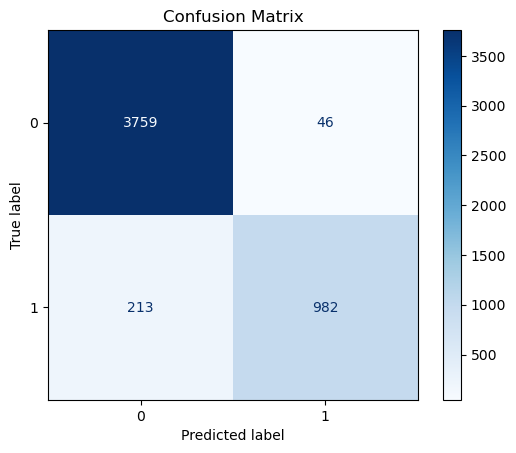

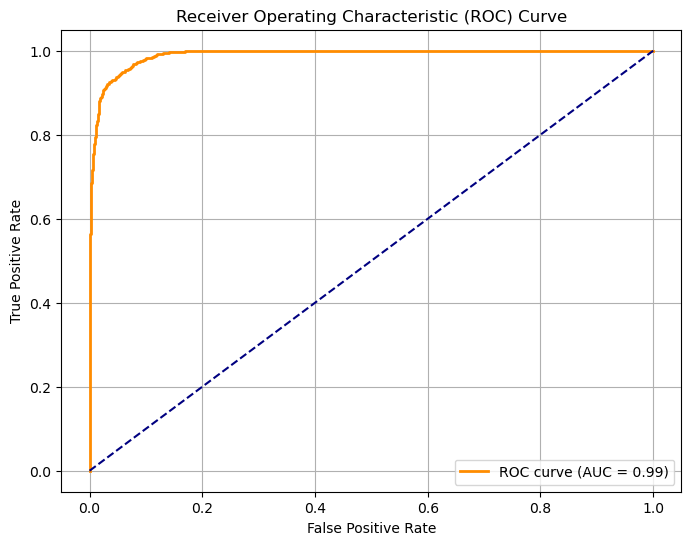

In [108]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [104]:
cost_fn = 8000
cost_fp = 50000

for col in cat_cols:
    print(f"\n--- Performance by segment for column: '{col}' ---")
    for segment in np.unique(X_test[col]):
        idx = X_test[col] == segment
        y_true_seg = y_test[idx]
        X_seg = X_test[idx]
        y_pred_seg = best_model.predict(X_seg)
        
        # Compute confusion matrix for the segment
        tn, fp, fn, tp = confusion_matrix(y_true_seg, y_pred_seg).ravel()
        
        # Number of applicants in this segment
        n_samples = len(y_true_seg)
        
        # Calculate total and average costs
        cost_FN = fn * cost_fn
        cost_FP = fp * cost_fp
        total_cost = cost_FN + cost_FP
        
        avg_cost_FN = cost_FN / n_samples
        avg_cost_FP = cost_FP / n_samples
        avg_total_cost = total_cost / n_samples
        
        print(f"\nSegment: {segment}")
        print(f"False Negatives (missed good loans): {fn}, avg cost: ${avg_cost_FN:,.2f}")
        print(f"False Positives (bad loans approved): {fp}, avg cost: ${avg_cost_FP:,.2f}")
        print(f"Average total cost of errors per applicant: ${avg_total_cost:,.2f}")



--- Performance by segment for column: 'EmploymentStatus' ---

Segment: Employed
False Negatives (missed good loans): 182, avg cost: $341.78
False Positives (bad loans approved): 34, avg cost: $399.06
Average total cost of errors per applicant: $740.85

Segment: Self-Employed
False Negatives (missed good loans): 19, avg cost: $395.83
False Positives (bad loans approved): 3, avg cost: $390.62
Average total cost of errors per applicant: $786.46

Segment: Unemployed
False Negatives (missed good loans): 12, avg cost: $269.66
False Positives (bad loans approved): 9, avg cost: $1,264.04
Average total cost of errors per applicant: $1,533.71

--- Performance by segment for column: 'EducationLevel' ---

Segment: Associate
False Negatives (missed good loans): 49, avg cost: $382.81
False Positives (bad loans approved): 8, avg cost: $390.62
Average total cost of errors per applicant: $773.44

Segment: Bachelor
False Negatives (missed good loans): 54, avg cost: $281.80
False Positives (bad loans a

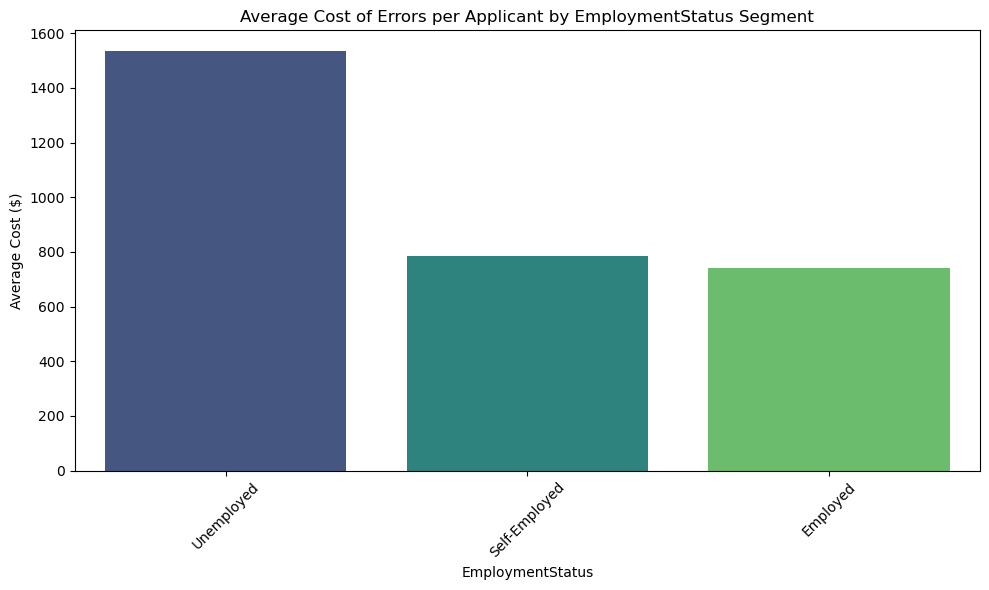

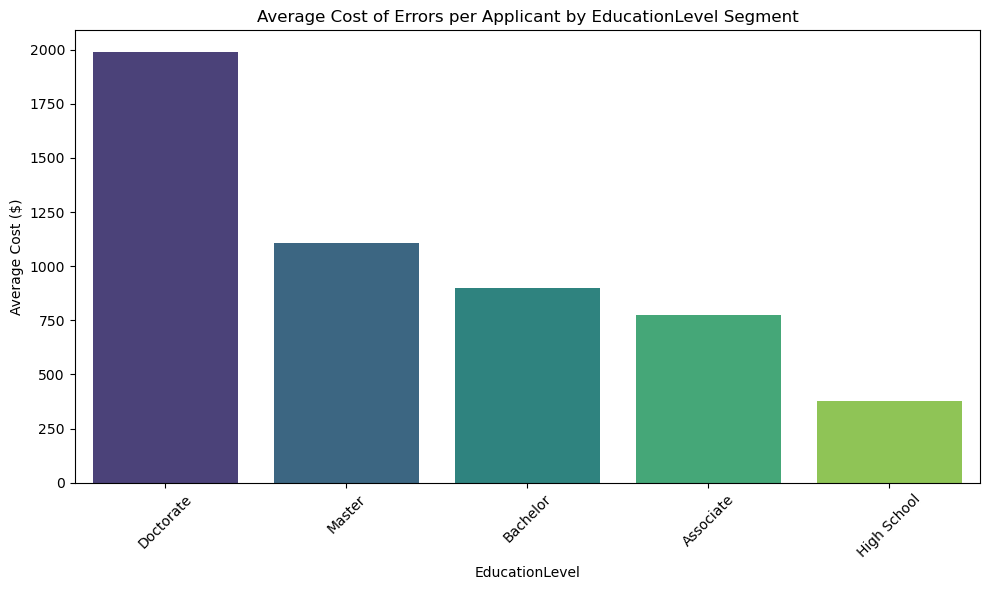

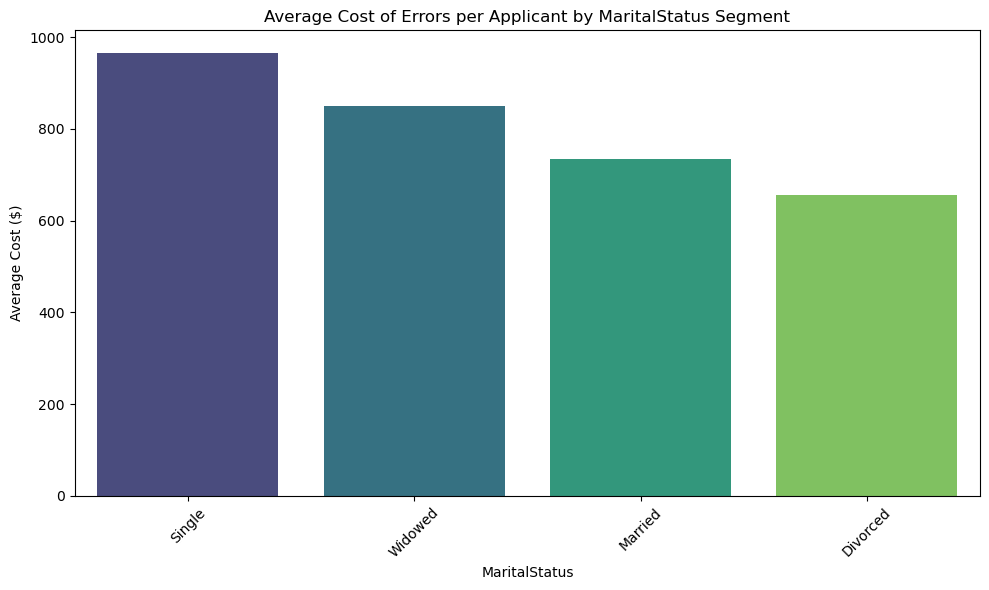

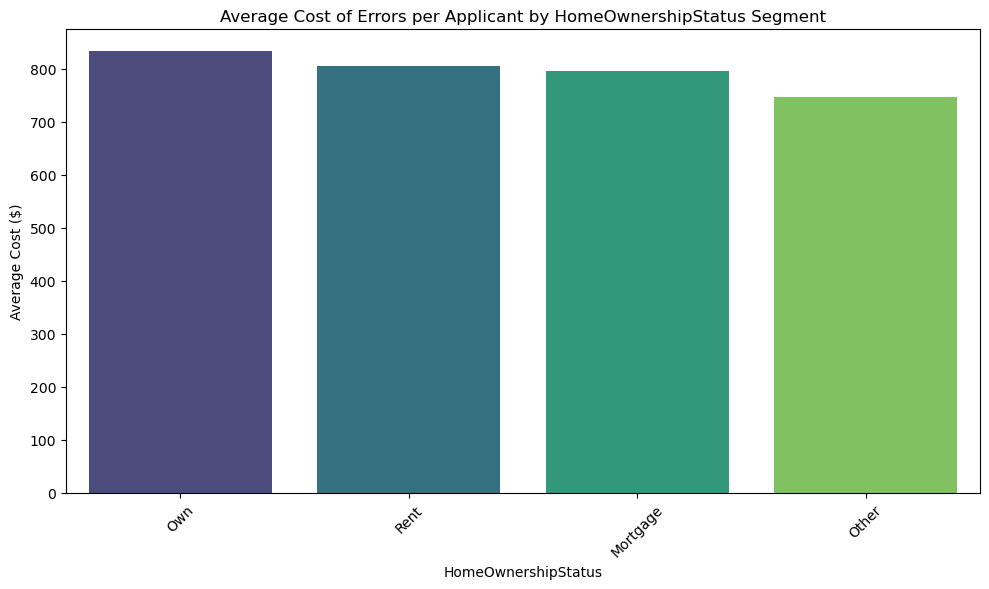

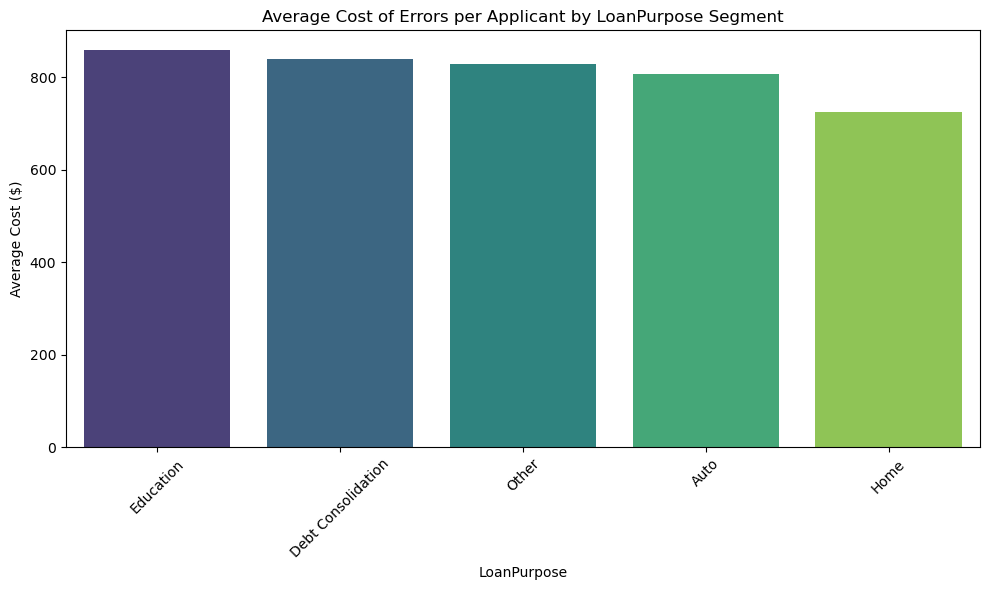

In [105]:
cost_fn = 8000
cost_fp = 50000

for col in cat_cols:
    data = []
    
    for segment in np.unique(X_test[col]):
        idx = X_test[col] == segment
        y_true_seg = y_test[idx]
        X_seg = X_test[idx]
        y_pred_seg = best_model.predict(X_seg)
        
        tn, fp, fn, tp = confusion_matrix(y_true_seg, y_pred_seg).ravel()
        
        # Calculate cost metrics
        cost_FN = fn * cost_fn
        cost_FP = fp * cost_fp
        total_cost = cost_FN + cost_FP
        n_samples = len(y_true_seg)
        
        # Avoid division by zero
        if n_samples == 0:
            continue
        
        avg_FN_cost = cost_FN / n_samples
        avg_FP_cost = cost_FP / n_samples
        avg_total_cost = total_cost / n_samples
        
        data.append({
            'Segment': segment,
            'Avg FN Cost': avg_FN_cost,
            'Avg FP Cost': avg_FP_cost,
            'Avg Total Cost': avg_total_cost
        })

    df_avg_cost = pd.DataFrame(data).sort_values('Avg Total Cost', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(
    data=df_avg_cost,
    x='Segment',
    y='Avg Total Cost',
    hue='Segment',
    palette='viridis',
    dodge=False  # ensures single bars, not grouped
    )
    plt.title(f'Average Cost of Errors per Applicant by {col} Segment')
    plt.ylabel('Average Cost ($)')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Top features by permutation importance:
MonthlyIncome            9670600.0
InterestRate             8371800.0
AnnualIncome             8129200.0
LengthOfCreditHistory    2856200.0
CreditScore              2517400.0
LoanAmount               2411600.0
EducationLevel           2030800.0
NetWorth                 1599600.0
BankruptcyHistory        1409000.0
MonthlyLoanPayment       1391000.0
dtype: float64


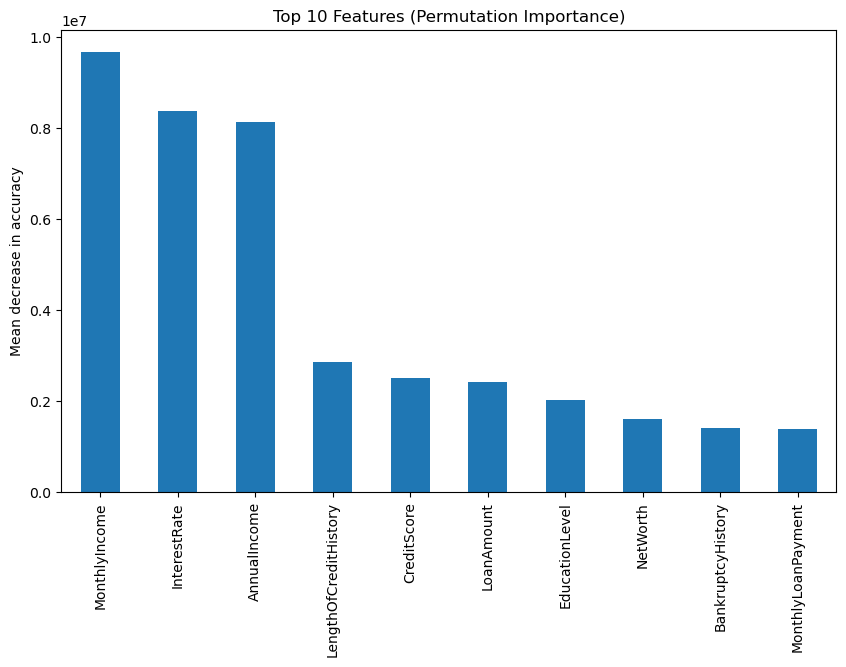

In [117]:
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

feat_importance = pd.Series(result.importances_mean, index=X_test.columns)
feat_importance = feat_importance.sort_values(ascending=False)

print("Top features by permutation importance:")
print(feat_importance.head(10))

feat_importance.head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Features (Permutation Importance)')
plt.ylabel('Mean decrease in accuracy')
plt.show()